<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/LenardJones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Poner símbolos
T, V, R, n, a, b, p = sp.symbols("T V R n a b p")
#Construimos la energía libre de Helmholtz
rho=p
deltaB = -0.58544978*T**(-3.5) + 0.43102052*T**(-3) + 0.87361369*T**(-2.5) - 4.13749995*T**(-2) + 2.90616279*T**(-1.5) - 7.02181962*T**(-1) + 0.02459877
d=0.011117524*(1/T)-0.076383859*T**(-1/2) + 1.080142248 + 0.000693129*T**(1/2) - 0.063920968*sp.log(T)
eta=(3.14159/6)*rho*d**3
A_hs=T*((5/3)*sp.log(1-eta) + (eta*(34-33*eta+4*eta**2))/(6*(1-eta)**2))
expo=sp.exp(-1.929*rho**2)*rho*T*deltaB
Cij = 2.01546797*rho**2 - 28.17881636*rho**3 + 28.28313847*rho**4 -10.42402873*rho**5
Cij += -19.58371655*T**(-1/2)*rho**2 + 75.62340289*T**(-1/2)*rho**3 -120.70586598*T**(-1/2)*rho**4 + 93.92740328*T**(-1/2)*rho**5 - 27.37737354*T**(-1/2)*rho**6
Cij += 29.34470520*T**(-1)*rho**2 -112.35356937*T**(-1)*rho**3 + 170.6490898*T**(-1)*rho**4 -123.06669187*T**(-1)*rho**5 + 34.42288969*T**(-1)*rho**6
Cij += -13.37031968*T**(-2)*rho**2 +65.3805957*T**(-2)*rho**3 -115.09233113*T**(-2)*rho**4 + 88.91973082*T**(-2)*rho**5 -25.6209989*T**(-2)*rho**6


In [ ]:
#energía de exceso
A    =  A_hs   +  expo  +  Cij

P_ex =  p*p*sp.diff(A, p)   +     0

P    =  P_ex    +   p*T
#calculamos las funciones respuesta
#Parte de exceso
x           =   sp.diff(A, T)
Cv_ex       =   -T*sp.diff(x, T)
alpha_ex    =   sp.diff(P_ex, T)/(p*sp.diff(P_ex, p))
beta_t_ex   =   1/(p*sp.diff(P_ex,p))
#Parte ideal
Cv_ideal        =   3/2
Cp_ideal        =   5/2
alpha_ideal     =   1/T
beta_t_ideal    =   1/(p*T)
beta_s_ideal    =   (3/5)*(1/(p*T))
#Parte total
Cv_LJ      =    (Cv_ex       +   Cv_ideal)
#alpha_LJ   =    (alpha_ex    +   alpha_ideal)
alpha_LJ   =    sp.diff(P, T)/(p*sp.diff(P, p))
#beta_t_LJ  =    (beta_t_ex   +   beta_t_ideal)
beta_t_LJ  =    1/(p*sp.diff(P,p))
Cp_LJ      =    (Cv_LJ       +   (T*alpha_LJ**2)/(beta_t_LJ*p) )
beta_s_LJ  =    ((beta_t_LJ*Cv_LJ)/Cp_LJ)


In [ ]:

#Definimos una función para graficar
def graficar(funcion, nombre):
    temperatura=1.5
    densidad=np.linspace(1e-2,1e-1,100)
    funcion0=[float(funcion.subs([(p,densidad[i]),(T,temperatura - 0.12)])) for i in range(len(densidad))]
    funcion1=[float(funcion.subs([(p,densidad[i]),(T,temperatura)       ])) for i in range(len(densidad))]
    funcion2=[float(funcion.subs([(p,densidad[i]),(T,temperatura + 0.1 )])) for i in range(len(densidad))]
    funcion3=[float(funcion.subs([(p,densidad[i]),(T,temperatura + 0.2 )])) for i in range(len(densidad))]
    funcion4=[float(funcion.subs([(p,densidad[i]),(T,temperatura + 0.3 )])) for i in range(len(densidad))]
    funcion5=[float(funcion.subs([(p,densidad[i]),(T,temperatura + 0.4 )])) for i in range(len(densidad))]
    plt.figure()
    plt.plot(densidad,funcion0,label=nombre + ' a temperatura 1.38k')
    plt.plot(densidad,funcion1,label=nombre + ' a temperatura 1.5k')
    plt.plot(densidad,funcion2,label=nombre + ' a temperatura 1.6k')
    plt.plot(densidad,funcion3,label=nombre + ' a temperatura 1.7k')
    plt.plot(densidad,funcion4,label=nombre + ' a temperatura 1.8k')
    plt.plot(densidad,funcion5,label=nombre + ' a temperatura 1.9k')
    plt.title(nombre, fontsize=18)
    plt.xscale("log")
    plt.title(nombre)
    plt.xlabel('rho')
    plt.legend()
    plt.show()



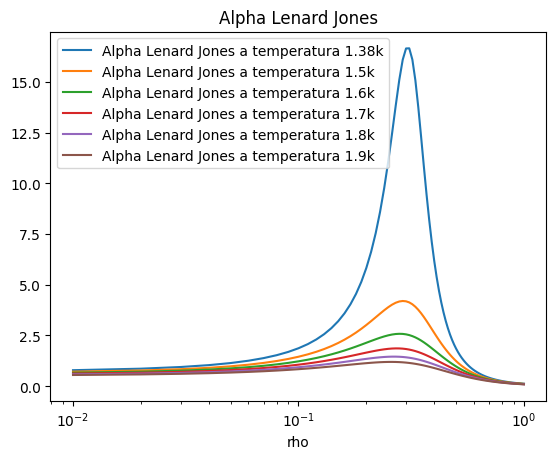

In [ ]:
graficar(alpha_LJ,"Alpha Lenard Jones")

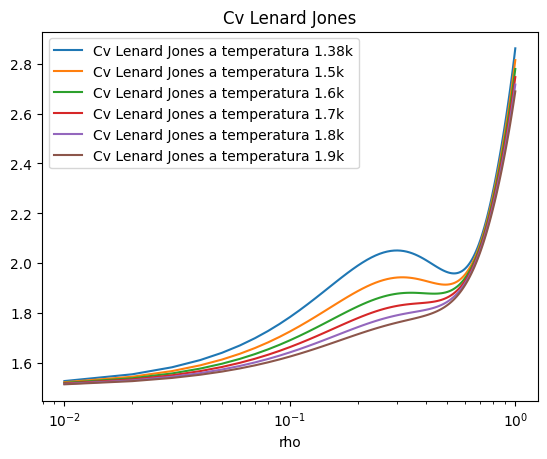

In [ ]:
graficar(Cv_LJ,"Cv Lenard Jones")

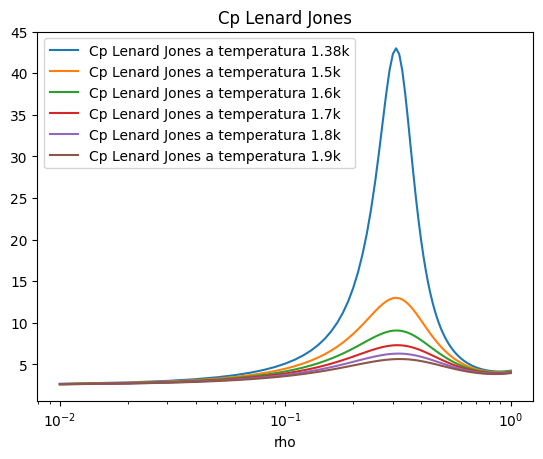

In [ ]:
graficar(Cp_LJ,"Cp Lenard Jones")

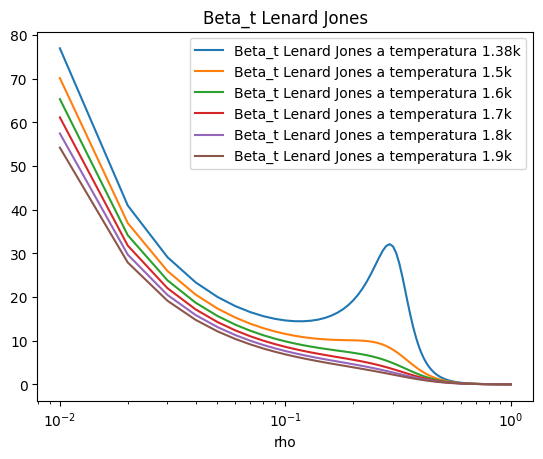

In [ ]:
graficar(beta_t_LJ,"Beta_t Lenard Jones")

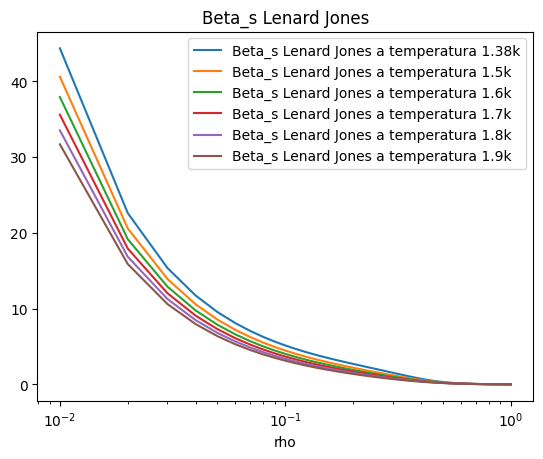

In [ ]:
graficar(beta_s_LJ,"Beta_s Lenard Jones")

In [ ]:
#calculamos los vectores
ratio_T=Cv_ideal/Cv_LJ
ratio_S=beta_t_ideal/beta_t_LJ
ratio_V=beta_t_LJ/beta_t_ideal
ratio_P=Cp_LJ/Cp_ideal


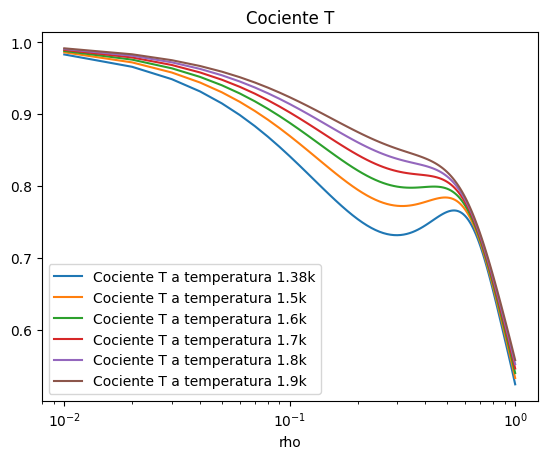

In [ ]:
graficar(ratio_T,"Cociente T")

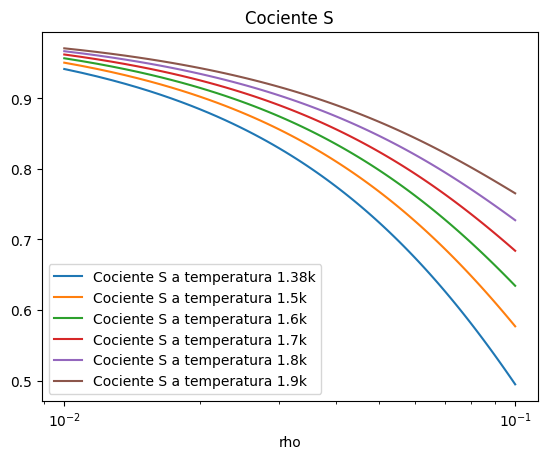

In [ ]:
graficar(ratio_S,"Cociente S")

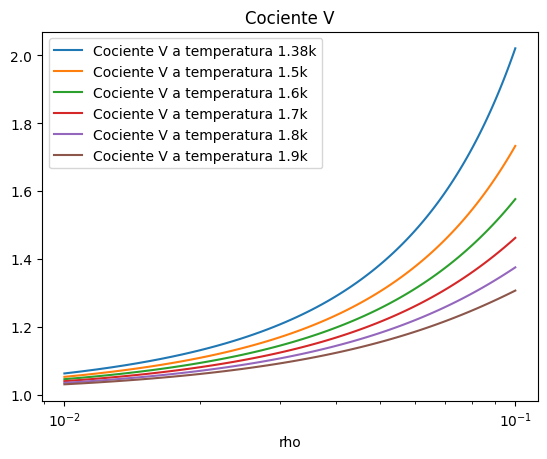

In [ ]:
graficar(ratio_V,"Cociente V")

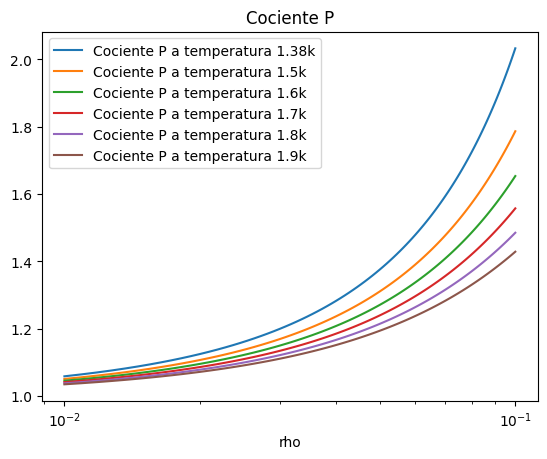

In [ ]:
graficar(ratio_P,"Cociente P")